In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from loaders import clean_text_for_pattern_letter
from temp_text_puh import template_str
input_str = clean_text_for_pattern_letter(template_str, out_len=len(template_str))
# input_str = clean_text_for_pattern_letter(template_str, out_len=500)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
111748
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [13]:
import copy

def divide_via_trace(inputs: list, decrease_rate: float = 0.5, increase_rate: float = 0.5):
    K: dict[str, int] = {}
    T = []
    
    prev_K: dict[str, int] = {}
    for inp_idx, inp in enumerate(inputs):
        # decrease
        for symbol, stats in K.items():
            # K[symbol] -= stats * decrease_rate
            # if stats > 0:
            #     K[symbol] -= 1 / (stats * decrease_rate)
            # else:
            #     K[symbol] = 0
            K[symbol] -= pow(decrease_rate, stats)

            if K[symbol] < 0:
                K[symbol] = 0

        # increase
        K.setdefault(inp, 0)
        K[inp] += pow(increase_rate, K[inp])
        # K[inp] += increase_rate

        # norm
        # K_D = {}
        # sum_K = sum(K.values())
        # for symbol, stats in K.items():
        #     K_D.setdefault(symbol, stats / sum_K)

        # compare to prev
        diff_sum = 0
        for symbol, stats in K.items():
            prev_stats = prev_K.get(symbol, 0)

            diff = abs(stats - prev_stats)
            diff_sum += diff

        for symbol, stats in prev_K.items():
            if not K.get(symbol):
                diff_sum += stats

        # get sum
        S = []
        for symbol, stats in K.items():
            S.append(stats)
        
        S = np.array(S, dtype='float')
        
        # t = np.mean(S)
        # t = np.sum(S)
        t = diff_sum
        T.append(t)

        # recur
        if inp_idx > 0:
            prev_K = copy.deepcopy(K)
    
    return T


In [14]:
def get_substrings(T:list, input:list):
    substrings: dict[str, int] = {}
    buffer = []

    peaks: dict[int, int] = {}

    for inp_idx, inp in enumerate(input):
        buffer.append(inp)

        if inp_idx == 0 or inp_idx >= len(input) - 3:
            continue

        if T[inp_idx] < T[inp_idx - 1] and T[inp_idx] < T[inp_idx + 1] and T[inp_idx + 3] > T[inp_idx - 1]:
            substr = ''.join(buffer)

            substrings.setdefault(substr, 0)
            substrings[substr] += 1

            buffer = []

            peaks.setdefault(inp_idx, 1)

    # sort
    substrings = dict(sorted(substrings.items(), key=lambda item: item[1], reverse=True))

    peaks.setdefault((len(input) - 1), 1)

    return substrings, peaks


In [15]:
def get_substrs_distribution(input: list, peaks: dict[int, int]):
    D = []
    d = {}
    S = 0
    
    for inp_idx, inp in enumerate(input):
        d.setdefault(inp, 0)
        d[inp] += 1
        S += 1

        if peaks.get(inp_idx):
            for symbol, stats in d.items():
                d[symbol] = stats / S
            
            D.append(copy.deepcopy(d))

            S = 0
            d = {}
    
    return D

In [16]:
def get_distribution_diff_rate(D: list[dict[str, int]]):
    DF = []

    for d_idx, d in enumerate(D):
        if d_idx >= len(D) - 1:
            break

        next_d = D[d_idx + 1]

        diff_sum = 0
        for symbol, stats in d.items():
            prev_stats = next_d.get(symbol, 0)

            diff = abs(stats - prev_stats)
            diff_sum += diff

        for symbol, stats in next_d.items():
            if not d.get(symbol):
                diff_sum += stats

        DF.append(diff_sum)
    
    return DF

In [17]:
def plot_T(T: list):
    T_arr = np.array(T, dtype=float)

    fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
    axs.plot(np.arange(T_arr.size), T_arr)

    plt.show()

In [18]:
def plot_T_with_symbols(T:list, inputs: list):
    T_arr = np.array(T, dtype=float)

    fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
    axs.plot(np.arange(T_arr.size), T_arr)
    axs.xaxis.set_ticks(np.arange(len(inputs)), inputs)
    axs.xaxis.grid(True)

    plt.show()

len(substrs_distr)=2703
len(DF)=2702


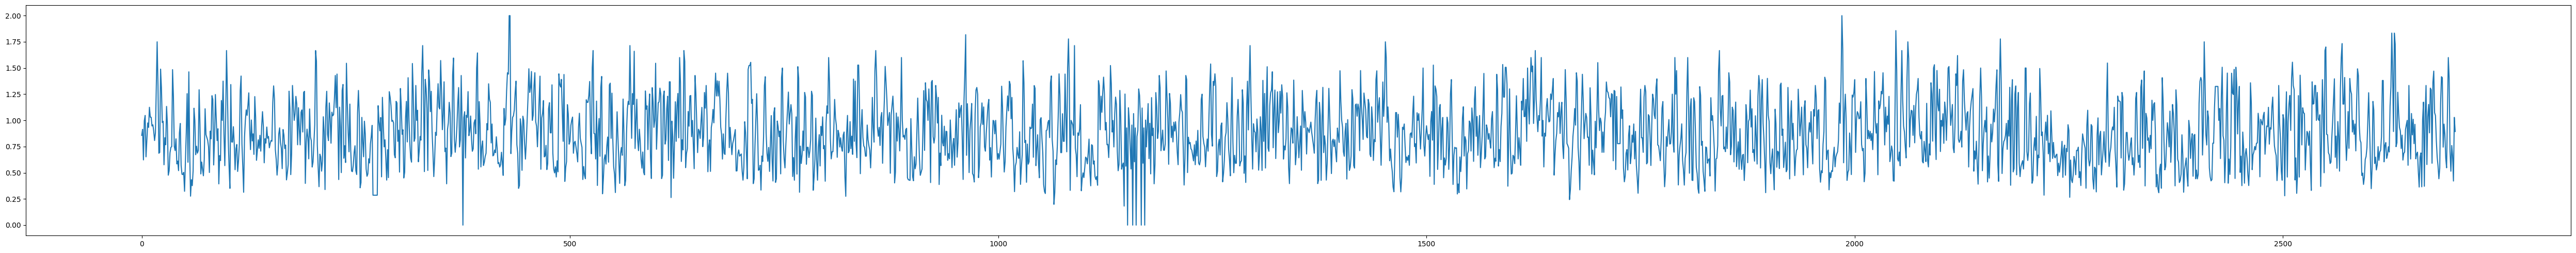

In [19]:
T = divide_via_trace(inputs=input_str, decrease_rate=0.5, increase_rate=0.5)
# plot_T_with_symbols(T=T, inputs=input_str)
# plot_T(T=T)
substrs, peaks = get_substrings(T, input=input_str)
substrs_distr = get_substrs_distribution(input=input_str, peaks=peaks)
print(f'{len(substrs_distr)=}')
DF = get_distribution_diff_rate(D=substrs_distr)
print(f'{len(DF)=}')
plot_T(T=DF)

# print(f'{len(substrs)=}')
# len_arr = []
# for substr, stats in substrs.items():
#     print(substr, stats)
#     len_arr.append(len(substr))

# len_arr = np.array(len_arr, dtype='float')
# print(f'{np.median(len_arr)=}')
# print(f'{np.sum(len_arr)=} =? {len(input_str)}')

In [20]:
# plot_T(T)

In [21]:
# for dr in range(1, 10):
#     decrease_rate = dr * 0.1
#     print(decrease_rate)
#     T = divide_via_trace(inputs=input_str, decrease_rate=decrease_rate)
#     plot_T(T)